# Imports

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.datasets import make_classification

# Data loading

In [58]:
titanic = pd.read_csv("train.csv")
tit_test = pd.read_csv("test.csv")


# EDA

In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Pclass

In [63]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [64]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

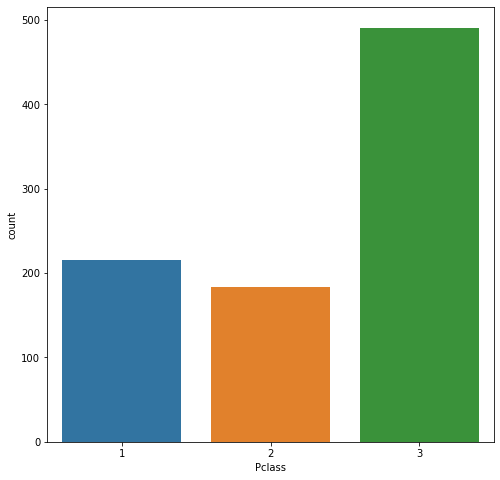

In [65]:
plt.figure(figsize=(8, 8))
sns.countplot(data=titanic, x=titanic.Pclass)

>Most of the passengers were from third class.

## Sex

In [66]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

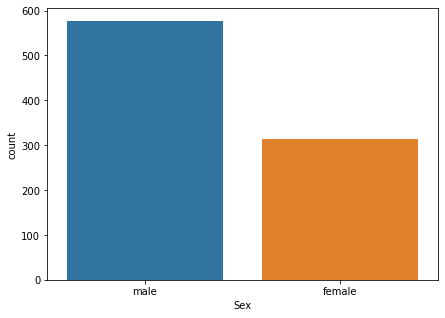

In [67]:
plt.figure(figsize=(7, 5))
sns.countplot(data=titanic, x=titanic.Sex)

>Males represent the majority of passengers' gender.

## Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

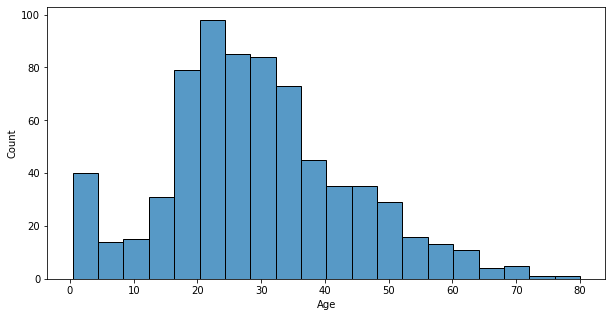

In [68]:
plt.figure(figsize=(10, 5))
sns.histplot(data=titanic, x=titanic.Age)

>The majority of passengers were between 25 and 30 years old.

## SibSp

In [69]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

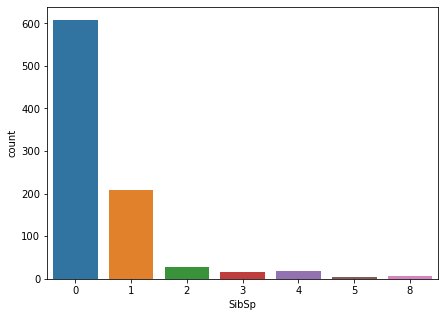

In [70]:
plt.figure(figsize=(7, 5))
sns.countplot(data=titanic, x=titanic.SibSp)

> The majority of passengers were without siblings and spouses.

## Parch

In [71]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

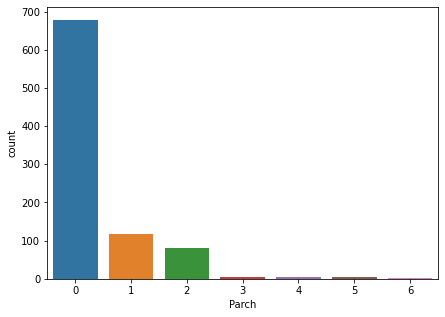

In [72]:
plt.figure(figsize=(7, 5))
sns.countplot(data=titanic, x=titanic.Parch)

> Most of passengers travelled without parents and children.

## Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

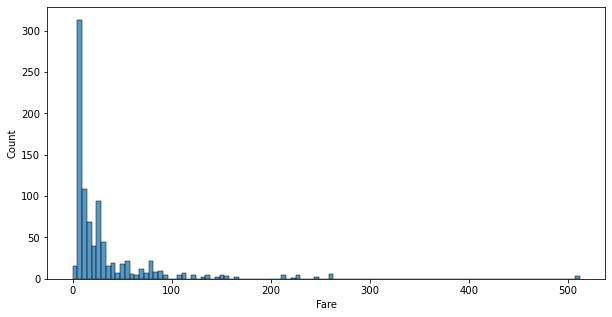

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(data=titanic, x=titanic.Fare)

## Embarked

In [74]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

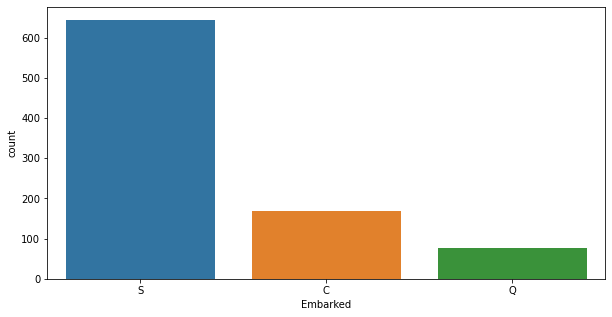

In [75]:
plt.figure(figsize=(10, 5))
sns.countplot(data=titanic, x=titanic.Embarked)

>Most of passengers left from Southampton port.

# Data preparation

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [79]:
titanic = titanic[titanic['Embarked'].notnull()]

In [80]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [81]:
titanic = titanic.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis = 1)

> I don't think I will need those columns.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

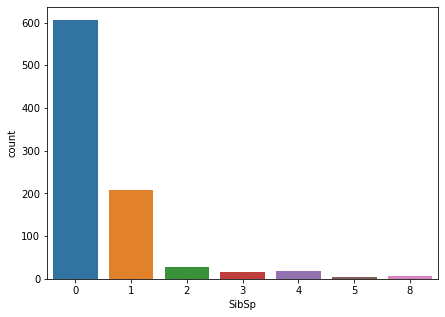

In [82]:
plt.figure(figsize=(7, 5))
sns.countplot(data=titanic, x=titanic.SibSp)

In [83]:
titanic['SibSp'] = np.where(titanic['SibSp']  > 2, 2, titanic['SibSp'] )

<AxesSubplot:xlabel='Parch', ylabel='count'>

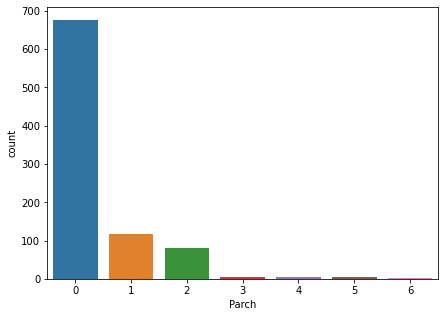

In [84]:
plt.figure(figsize=(7, 5))
sns.countplot(data=titanic, x=titanic.Parch)

In [85]:
titanic['Parch'] = np.where(titanic['Parch']  > 2, 2, titanic['Parch'] )

In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 94.8+ KB


In [87]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


In [88]:
tit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [89]:
tit_test = tit_test.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis = 1)

In [90]:
tit_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [91]:
tit_test['Age'].fillna(tit_test['Age'].mean(), inplace=True)

In [92]:
titanic['SibSp'] = np.where(titanic['SibSp']  > 2, 2, titanic['SibSp'] )

In [93]:
titanic['Parch'] = np.where(titanic['Parch']  > 2, 2, titanic['Parch'] )

In [94]:
tit_test = pd.get_dummies(tit_test, columns=['Sex', 'Embarked'])
tit_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,0,1,0,1,0
1,893,3,47.0,1,0,1,0,0,0,1
2,894,2,62.0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,0,1,0,0,1
4,896,3,22.0,1,1,1,0,0,0,1


# Models

In [95]:
x = titanic.drop(['Survived', 'PassengerId'], axis = 1)
y = titanic['Survived']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Decision tree

In [96]:
d_tree = tree.DecisionTreeClassifier()
d_tree = d_tree.fit(x_train, y_train)

In [97]:
print(classification_report(y_val, d_tree.predict(x_val)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.66      0.69        68

    accuracy                           0.78       178
   macro avg       0.76      0.75      0.76       178
weighted avg       0.77      0.78      0.77       178



## Random forest

In [98]:
rnd_forest = RandomForestClassifier(random_state=42)
rnd_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
print(classification_report(y_val, rnd_forest.predict(x_val)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



## Logistic regression

In [100]:
lgReg = LogisticRegression(random_state=42)
lgReg.fit(x_train,y_train)

d:\2\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [101]:
print(classification_report(y_val, lgReg.predict(x_val)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.69      0.73        68

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



## AdaBoost

In [102]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [103]:
print(classification_report(y_val, ada_boost.predict(x_val)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.77      0.75      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [104]:
passengerId_ser = tit_test['PassengerId']
tit_test = tit_test.drop('PassengerId', axis = 1)

In [105]:
survived_ser = pd.Series(ada_boost.predict(tit_test))
survived_ser

0      0
1      0
2      1
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [106]:
res = pd.concat([passengerId_ser, survived_ser], axis = 1)
res.columns = ['PassengerId', 'Survived']

In [107]:
res.to_csv('submission.csv', index=False)

In [108]:
res.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1


## Naive Bayes

In [109]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [110]:
print(classification_report(y_val, naive_bayes.predict(x_val)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       110
           1       0.69      0.72      0.71        68

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



> Adaboost has the best accuracy.

> Kaggle competition score: 0.75358